# Import Data

In [137]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# Data Overview
df = pd.read_csv('customer_lifetime_value_dataset(1).csv')

In [139]:
df.head()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerid              10000 non-null  int64  
 1   firstpurchasedate       10000 non-null  object 
 2   lastpurchasedate        10000 non-null  object 
 3   totalpurchases          10000 non-null  int64  
 4   totalrevenue            10000 non-null  int64  
 5   referralsource          10000 non-null  object 
 6   churnindicator          10000 non-null  int64  
 7   discountsused           10000 non-null  int64  
 8   productcategory         10000 non-null  object 
 9   responsetolastcampaign  10000 non-null  object 
 10  feedbackscore           10000 non-null  float64
 11  preferredpaymentmethod  10000 non-null  object 
 12  supportticketsraised    10000 non-null  object 
 13  hasloyaltycard          10000 non-null  object 
 14  frequency               10000 non-null 

# Basic Feature Engineering:
1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
2. Create 'recency' Number of days since the last purchase.
3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
4. Create 'avgtimebetweenpurchases': Average number of days between purchases.

In [141]:
# 1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
df['avgpurchasevalue'] = df['totalrevenue'] / df['totalpurchases']
df.head(10)

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462
5,23498,2021-05-31,2022-02-03,8,10665,Word of mouth,1,2,O25,ignored,5.000000,credit card,0,no,7,1333.125000
6,22735,2021-09-21,2021-12-14,29,4866,Word of mouth,0,4,V08,ignored,1.961208,credit card,0,yes,29,167.793103
7,41296,2019-06-28,2023-07-31,25,8826,In-store promotions,0,2,S31,opened mail,5.000000,cash,0,no,21,353.040000
8,14351,2019-06-05,2019-06-13,7,9978,Influencer endorsements,0,4,Y30,ignored,5.000000,debit card,0,no,7,1425.428571
9,22571,2020-05-15,2023-06-30,26,6085,Influencer endorsements,1,6,C86,ignored,5.000000,apple pay,0,no,17,234.038462


In [142]:
# 2. Create 'recency' Number of days since the last purchase.

#considering a constant date of '2023-09-01' to create the column.
from datetime import datetime  # importing the datetime library

today = datetime(2023, 9, 1)    # setting the constant date

df['lastpurchasedate'] = pd.to_datetime(df['lastpurchasedate'])   # converting the column to a datetime object

df['recency'] = (today - df['lastpurchasedate']).dt.days

df.head(10)


,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540
5,23498,2021-05-31,2022-02-03,8,10665,Word of mouth,1,2,O25,ignored,5.000000,credit card,0,no,7,1333.125000,575
6,22735,2021-09-21,2021-12-14,29,4866,Word of mouth,0,4,V08,ignored,1.961208,credit card,0,yes,29,167.793103,626
7,41296,2019-06-28,2023-07-31,25,8826,In-store promotions,0,2,S31,opened mail,5.000000,cash,0,no,21,353.040000,32
8,14351,2019-06-05,2019-06-13,7,9978,Influencer endorsements,0,4,Y30,ignored,5.000000,debit card,0,no,7,1425.428571,1541
9,22571,2020-05-15,2023-06-30,26,6085,Influencer endorsements,1,6,C86,ignored,5.000000,apple pay,0,no,17,234.038462,63


In [143]:
# 3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
df['firstpurchasedate'] = pd.to_datetime(df['firstpurchasedate'])   # converting the column to a datetime object

df['tenure'] = (today - df['firstpurchasedate']).dt.days

df.head(10)




,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544,609
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211,1435
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574,810
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376,765
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540,955
5,23498,2021-05-31,2022-02-03,8,10665,Word of mouth,1,2,O25,ignored,5.000000,credit card,0,no,7,1333.125000,575,823
6,22735,2021-09-21,2021-12-14,29,4866,Word of mouth,0,4,V08,ignored,1.961208,credit card,0,yes,29,167.793103,626,710
7,41296,2019-06-28,2023-07-31,25,8826,In-store promotions,0,2,S31,opened mail,5.000000,cash,0,no,21,353.040000,32,1526
8,14351,2019-06-05,2019-06-13,7,9978,Influencer endorsements,0,4,Y30,ignored,5.000000,debit card,0,no,7,1425.428571,1541,1549
9,22571,2020-05-15,2023-06-30,26,6085,Influencer endorsements,1,6,C86,ignored,5.000000,apple pay,0,no,17,234.038462,63,1204


In [144]:
# 4. Create 'avgtimebetweenpurchases': Average number of days between purchases.
df['avgtimebetweenpurchases'] = (df['lastpurchasedate'] - df['firstpurchasedate']).dt.days / df['totalpurchases']
df.head(10)



,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544,609,9.285714
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211,1435,61.200000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574,810,8.137931
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376,765,25.933333
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540,955,31.923077
5,23498,2021-05-31,2022-02-03,8,10665,Word of mouth,1,2,O25,ignored,5.000000,credit card,0,no,7,1333.125000,575,823,31.000000
6,22735,2021-09-21,2021-12-14,29,4866,Word of mouth,0,4,V08,ignored,1.961208,credit card,0,yes,29,167.793103,626,710,2.896552
7,41296,2019-06-28,2023-07-31,25,8826,In-store promotions,0,2,S31,opened mail,5.000000,cash,0,no,21,353.040000,32,1526,59.760000
8,14351,2019-06-05,2019-06-13,7,9978,Influencer endorsements,0,4,Y30,ignored,5.000000,debit card,0,no,7,1425.428571,1541,1549,1.142857
9,22571,2020-05-15,2023-06-30,26,6085,Influencer endorsements,1,6,C86,ignored,5.000000,apple pay,0,no,17,234.038462,63,1204,43.884615


# <center> EDA

### Preliminary EDA:
    1. Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure.
    2. Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?
    3. Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.
    4. Identify any missing values in the dataset. How many missing values are there in each column?

In [145]:
df.head(5)

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544,609,9.285714
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211,1435,61.200000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574,810,8.137931
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376,765,25.933333
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540,955,31.923077


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customerid               10000 non-null  int64         
 1   firstpurchasedate        10000 non-null  datetime64[ns]
 2   lastpurchasedate         10000 non-null  datetime64[ns]
 3   totalpurchases           10000 non-null  int64         
 4   totalrevenue             10000 non-null  int64         
 5   referralsource           10000 non-null  object        
 6   churnindicator           10000 non-null  int64         
 7   discountsused            10000 non-null  int64         
 8   productcategory          10000 non-null  object        
 9   responsetolastcampaign   10000 non-null  object        
 10  feedbackscore            10000 non-null  float64       
 11  preferredpaymentmethod   10000 non-null  object        
 12  supportticketsraised     10000 no

In [147]:
df.describe()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,churnindicator,discountsused,feedbackscore,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
count,10000.000000,10000,10000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27519.237400,2020-08-20 10:49:00.480000,2022-02-24 23:18:23.040000,19.28050,8521.876100,0.498700,2.993600,4.433905,10.053700,629.636381,553.028900,1106.549300,34.666420
min,5000.000000,2019-02-04 00:00:00,2019-02-24 00:00:00,1.00000,4401.000000,0.000000,0.000000,1.006071,1.000000,123.150000,2.000000,7.000000,0.000000
25%,16144.750000,2019-09-17 00:00:00,2021-05-27 00:00:00,13.00000,6427.750000,0.000000,1.000000,4.251318,4.000000,314.570238,222.000000,821.000000,13.649265
50%,27617.000000,2020-06-21 00:00:00,2022-05-05 12:00:00,20.00000,8543.000000,0.000000,3.000000,4.985672,9.000000,435.362732,483.500000,1167.000000,26.888889
75%,38967.250000,2021-06-02 00:00:00,2023-01-22 00:00:00,26.00000,10589.250000,1.000000,5.000000,5.000000,14.000000,649.432456,827.000000,1445.000000,42.265873
max,49994.000000,2023-08-25 00:00:00,2023-08-30 00:00:00,40.00000,12678.000000,1.000000,6.000000,5.000000,31.000000,12658.000000,1650.000000,1670.000000,1479.000000
std,13118.347463,NaN,NaN,7.82962,2388.452322,0.500023,2.005283,0.920760,7.098652,816.565606,392.283779,392.949289,44.310563


In [148]:
def FindMissingColsPercentage(df):
  """"Checking for missing values in a dataframe and returns the column names, if any.

  Args:
    df (Dataframe): The dataframe to be checked for missing values.

  Returns:
    Column names with missing values, total number of missing values and percentage, or
    no missing values if dataframe doesn't contain missing values.
  """""
  total = 0
  for col in df.columns:
      missing_vals = df[col].isnull().sum()
      pct = df[col].isnull().mean() * 100 
      if missing_vals != 0:
        print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals
    
  if total == 0:
      print("no missing values")

In [149]:
FindMissingColsPercentage(df)

no missing values


In [150]:
df.isnull().sum()

customerid                 0
firstpurchasedate          0
lastpurchasedate           0
totalpurchases             0
totalrevenue               0
referralsource             0
churnindicator             0
discountsused              0
productcategory            0
responsetolastcampaign     0
feedbackscore              0
preferredpaymentmethod     0
supportticketsraised       0
hasloyaltycard             0
frequency                  0
avgpurchasevalue           0
recency                    0
tenure                     0
avgtimebetweenpurchases    0
dtype: int64

### Univariate Analysis:
    1. Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?
    2. For each categorical column, generate bar plots depicting the frequency of each category. Which category dominates in each column?


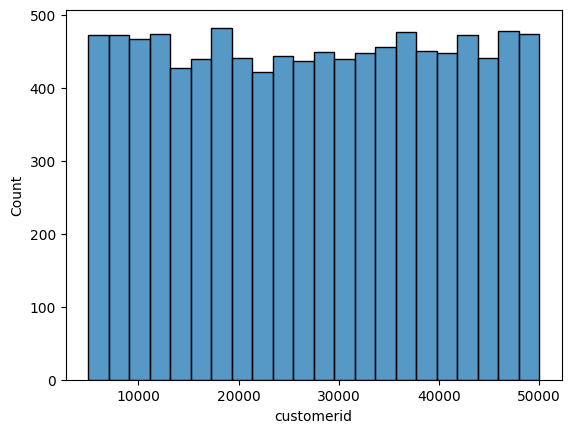

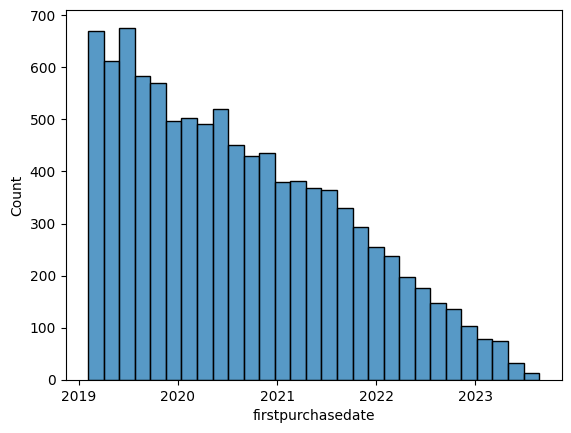

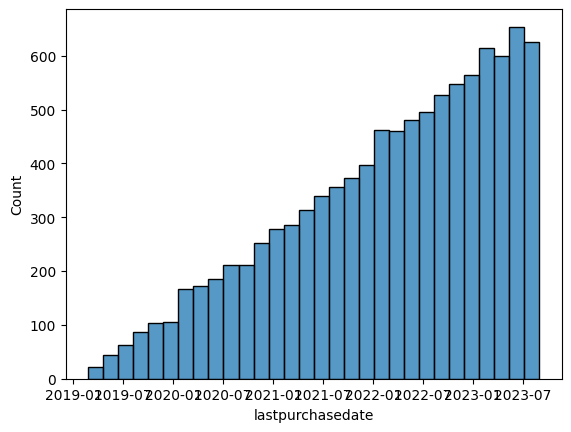

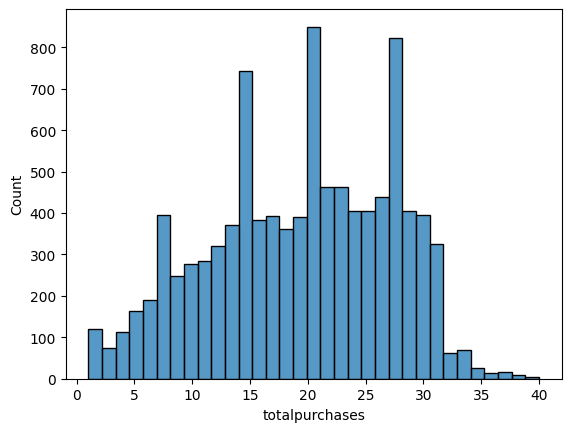

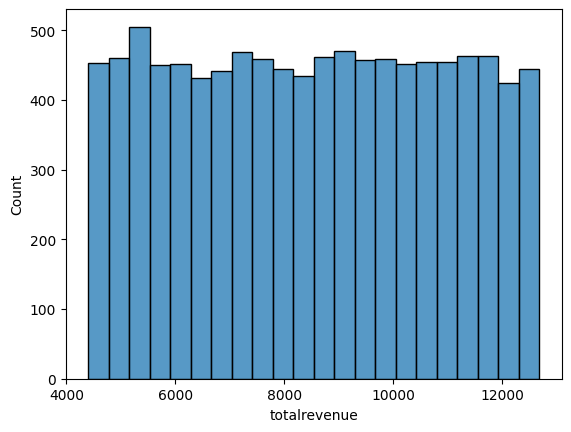

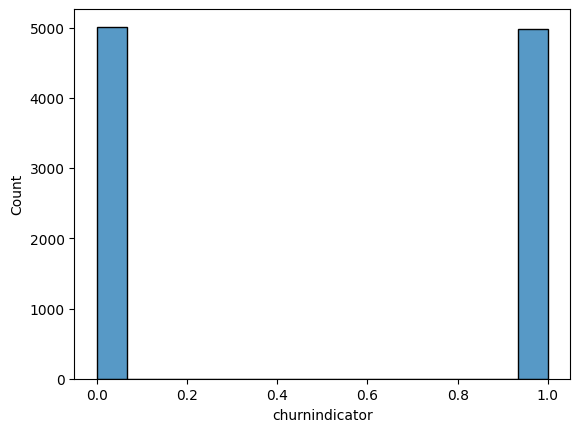

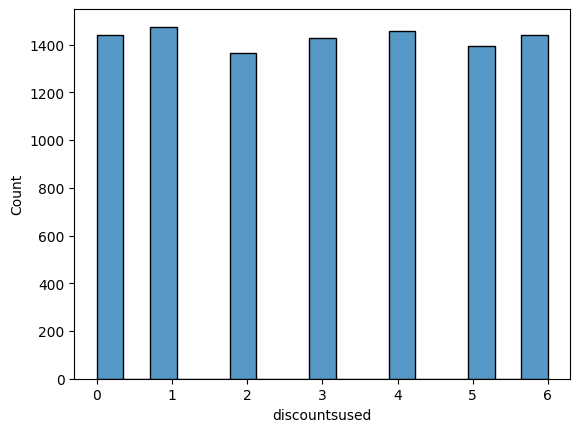

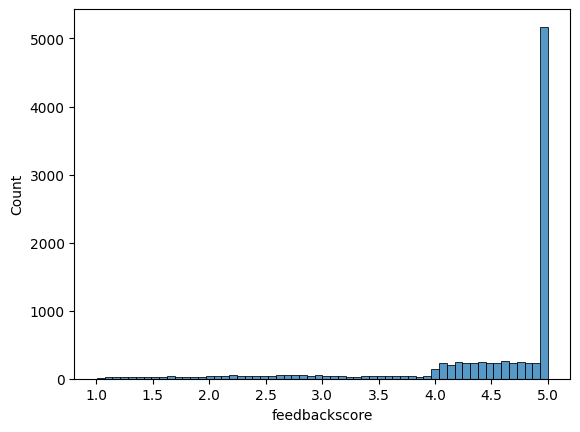

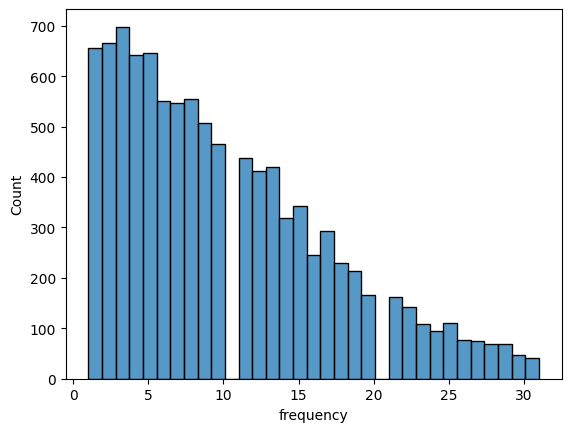

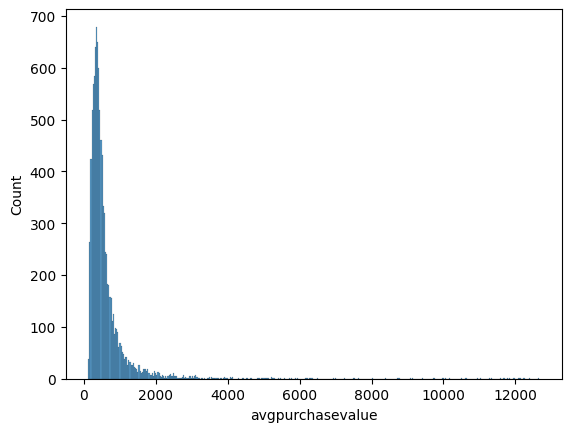

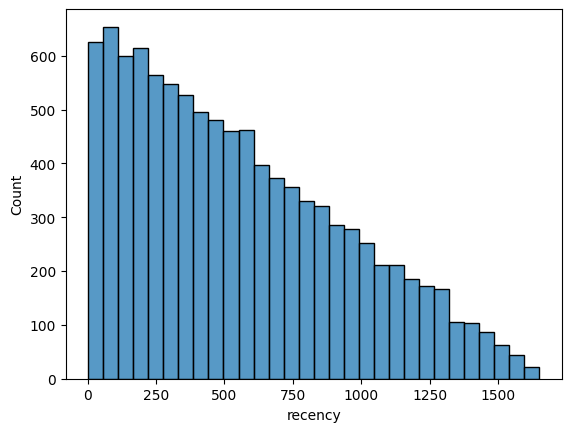

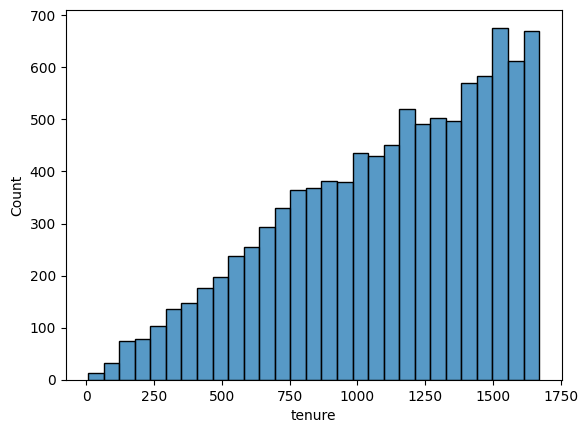

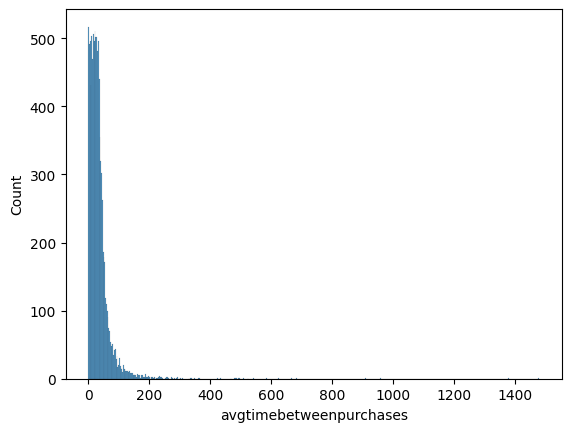

In [151]:
for i in df.select_dtypes(exclude=['object']).columns:
    sns.histplot(df[i])
    plt.show()

In [152]:
df['productcategory'].value_counts()

productcategory
K95    12
D72    12
D12    11
K73    11
W80    11
       ..
N85     1
X71     1
W52     1
Y50     1
W69     1
Name: count, Length: 2552, dtype: int64

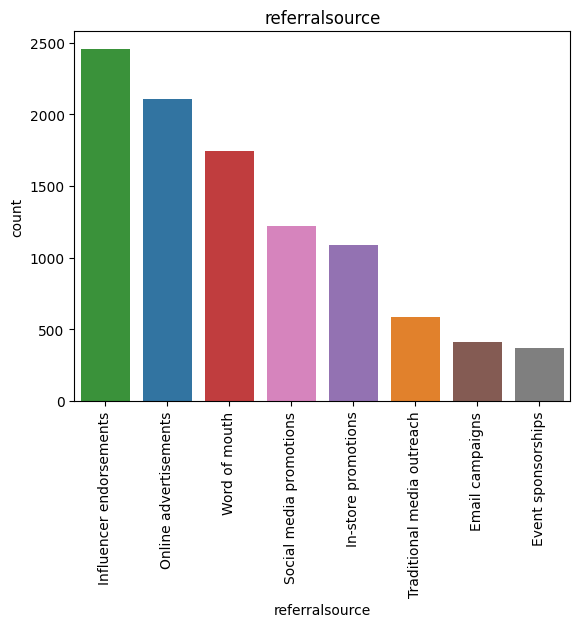

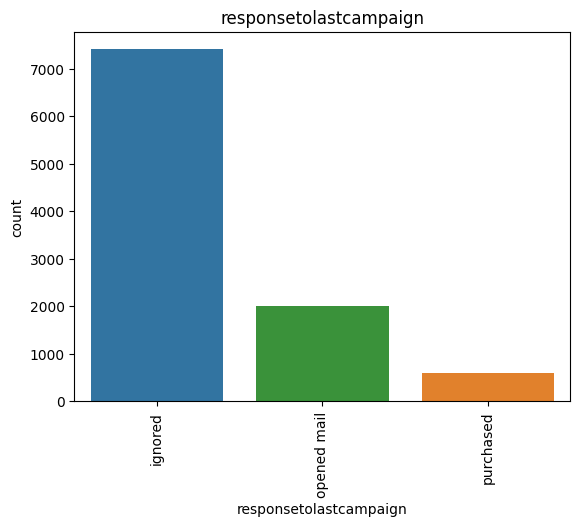

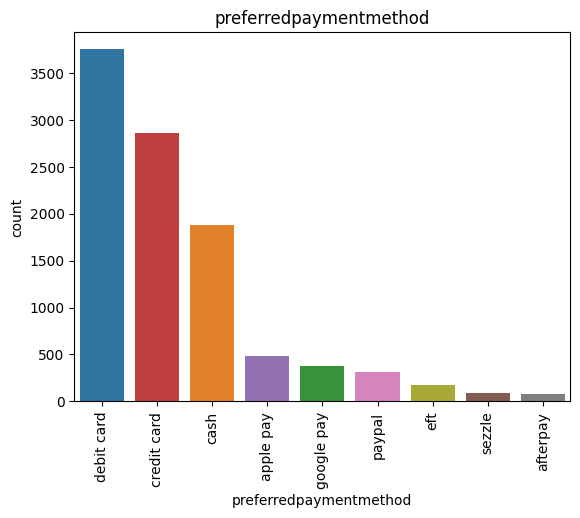

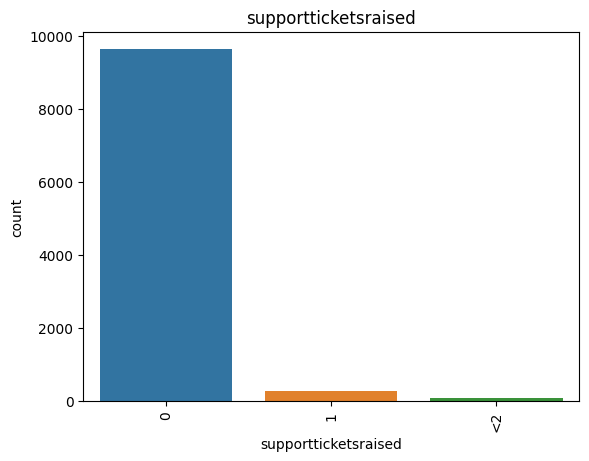

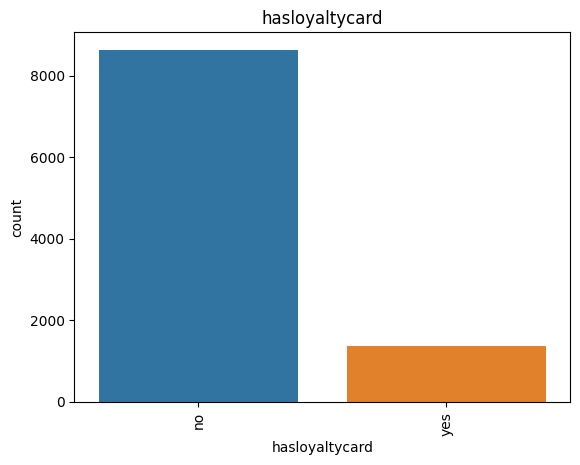

In [153]:
#plotting bar graphs for categorical data
for i in df.select_dtypes(include=['object']).columns:
    if i != 'productcategory':
        sns.countplot(data=df, x=i, hue=i, order=df[i].value_counts().index)
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()

In [154]:
for i in df.select_dtypes(include=['object']).columns:
    dom_cat = df[i].value_counts().idxmax()
    print(f'For {i} column: Dominant category is "{dom_cat}"')

For referralsource column: Dominant category is "Influencer endorsements"
For productcategory column: Dominant category is "K95"
For responsetolastcampaign column: Dominant category is "ignored"
For preferredpaymentmethod column: Dominant category is "debit card"
For supportticketsraised column: Dominant category is "0"
For hasloyaltycard column: Dominant category is "no"


### Bivariate Analysis:
    1. Construct a correlation matrix for all the numerical features in the dataset. Which pairs of features are highly correlated? Are there any unexpected correlations?
    2. Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset. Which category tends to have higher values for the chosen numerical column?


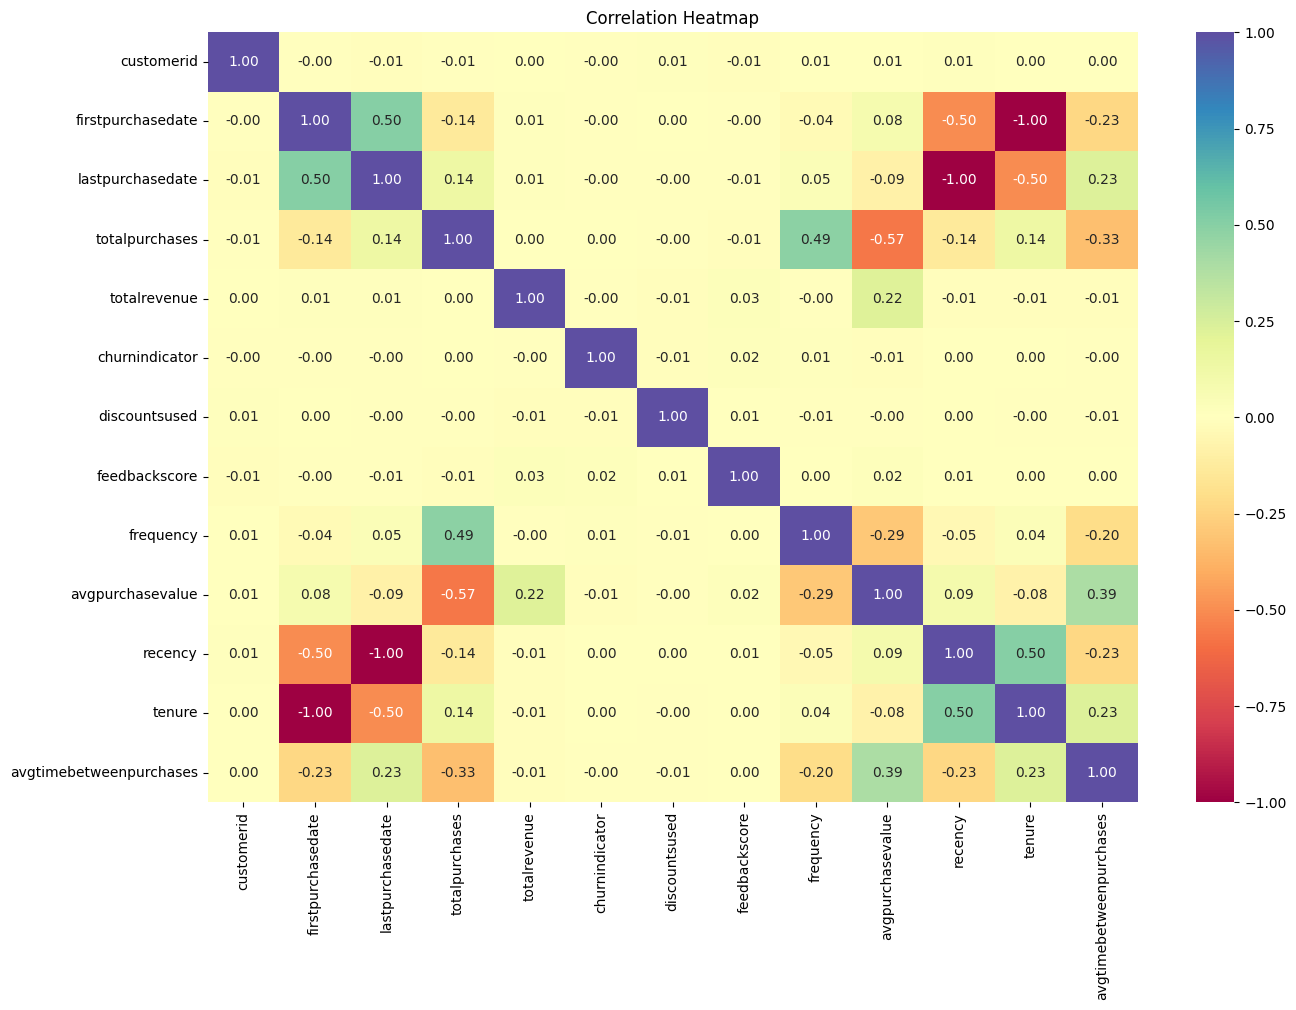

In [155]:
corr_mat = df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='Spectral')
plt.title('Correlation Heatmap')
plt.show()


In [156]:
df.groupby('preferredpaymentmethod')['totalrevenue'].sum().sort_values(ascending=False)

preferredpaymentmethod
debit card     31972616
credit card    24237677
cash           16069325
apple pay       4077928
google pay      3268689
paypal          2716001
eft             1474995
afterpay         702750
sezzle           698780
Name: totalrevenue, dtype: int64

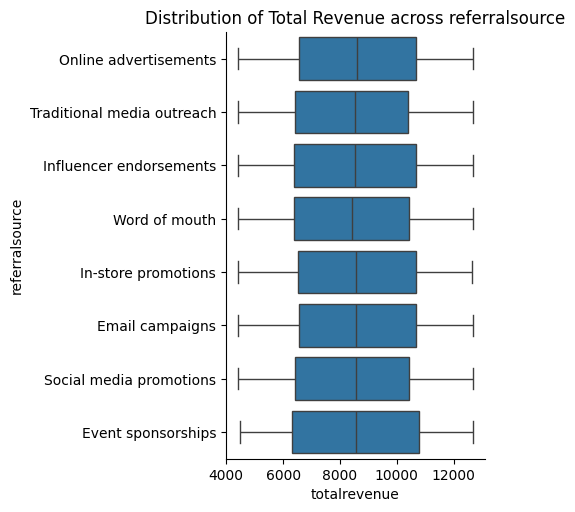

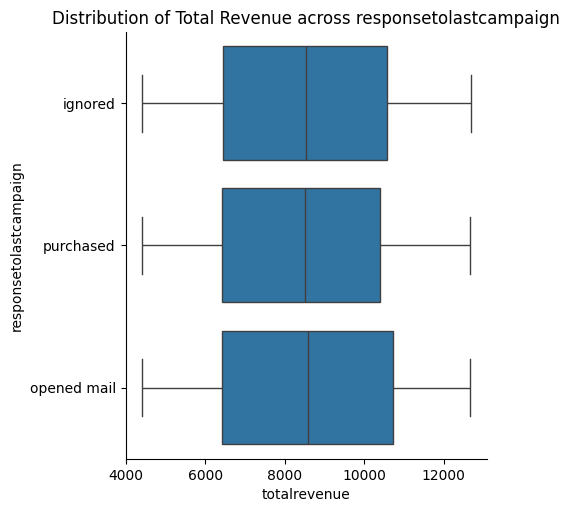

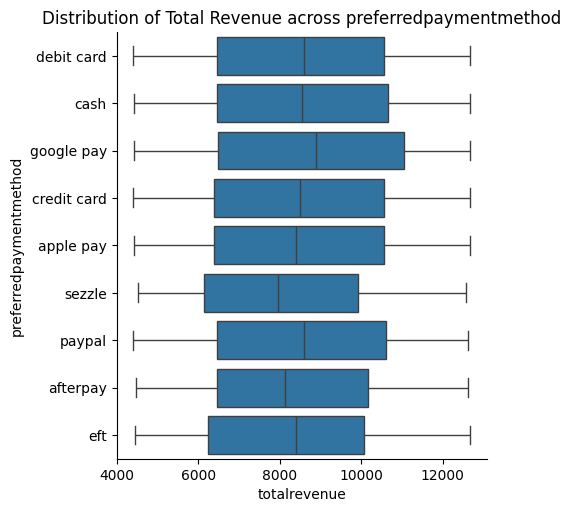

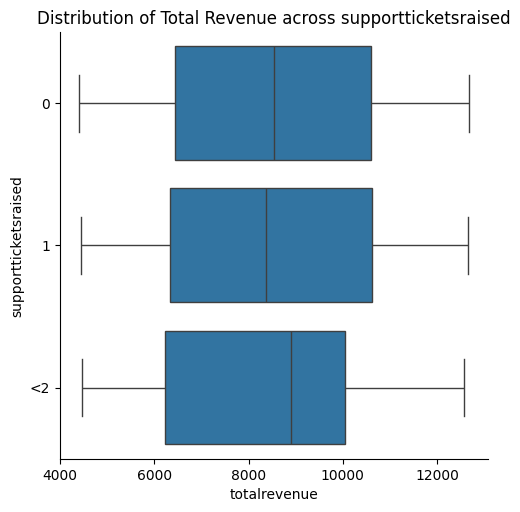

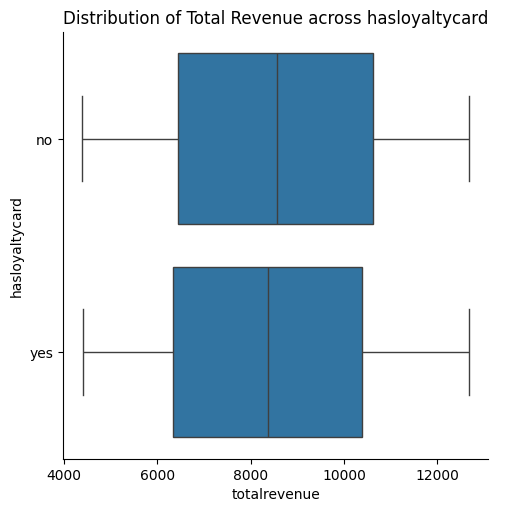

In [157]:
for i in df.select_dtypes(include=['object']).columns:
    if i != 'productcategory':
        sns.catplot(data=df, y=i, x='totalrevenue', kind='box')
        # plt.xticks(rotation=90)
        plt.title(f'Distribution of Total Revenue across {i}')
        plt.show()


### Advanced Analysis:
    1. Use a pair plot to visualize relationships between a select set of columns (totalpurchases, totalrevenue, avgpurchasevalue, frequency). Can you identify any clusters or outliers from the plots?
    2. Analyze the total revenue trend based on the year of the first purchase. In which year did customers contribute the most to total revenue?
    3. Use the RFM (Recency, Frequency, Monetary) model to identify the top 5% of customers. List their customerid and associated RFM_Score.


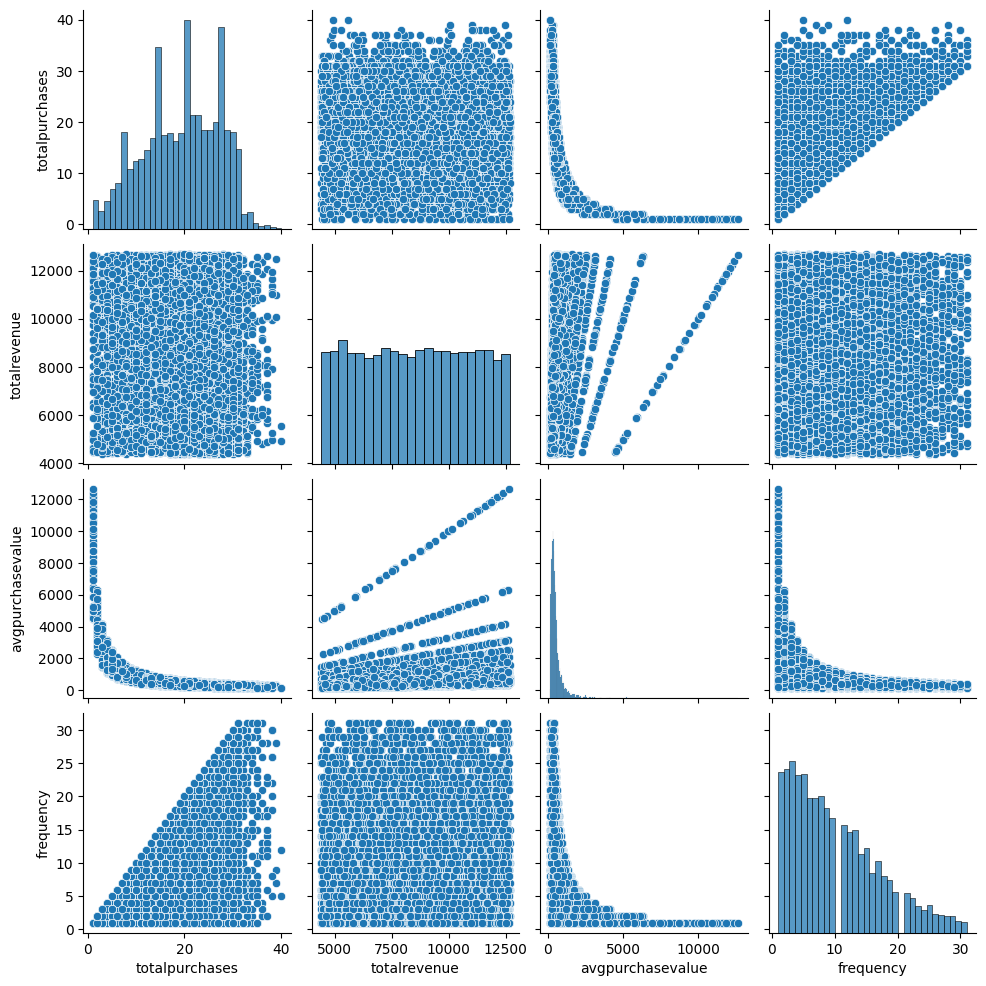

In [158]:
sns.pairplot(data=df, vars=['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency'])

In [159]:
df.groupby(df['firstpurchasedate'].dt.strftime('%Y'))['totalrevenue'].sum().reset_index()

,firstpurchasedate,totalrevenue
0,2019,29523812
1,2020,25680180
2,2021,18749818
3,2022,9467228
4,2023,1797723


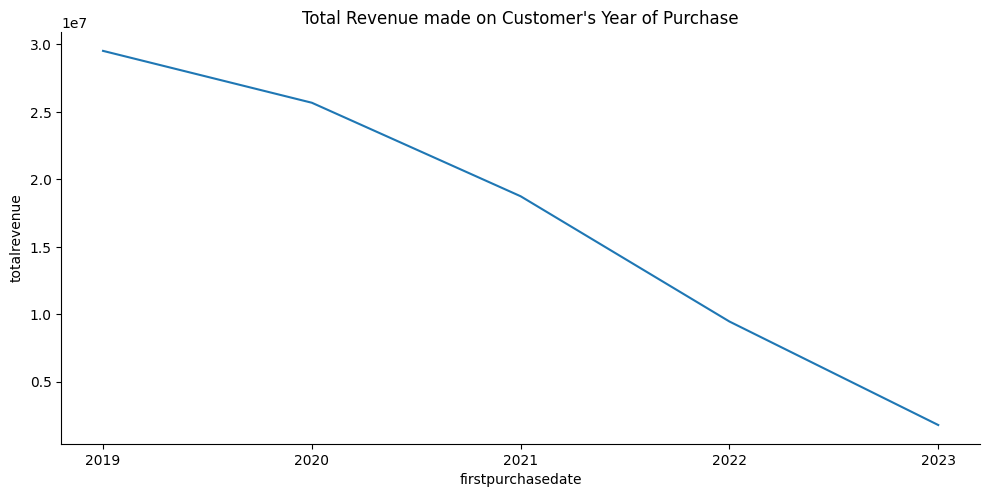

In [160]:
# total revenue on first year of purchase

sns.relplot(
    data=df.groupby(df['firstpurchasedate'].dt.strftime('%Y'))['totalrevenue'].sum().reset_index(),
    x='firstpurchasedate',
    y='totalrevenue',
    kind='line',
    aspect=2,
    estimator='sum',
    errorbar=None
)
plt.title("Total Revenue made on Customer's Year of Purchase")
plt.show()


In [161]:
rfm = df[['customerid', 'recency', 'frequency', 'totalrevenue']]  # subsetting these columns and assigning them to rfm
rfm.set_index('customerid', inplace=True)  # setting customerid column as index
rfm.columns = ['recency', 'frequency', 'monetary']  # renaming the columns
rfm


,recency,frequency,monetary
customerid,,,
8519,544,7,11670
38152,211,2,5260
19680,574,4,9790
35744,376,13,9591
11663,540,11,10134
...,...,...,...
21419,45,6,10023
24140,788,11,5121
32519,828,17,5962


In [162]:
# Customers with the lowest recency, highest frequency and monetary amounts will be considered as top customers.
# Using quantiles to compute the RFM values towards generating the RFM score
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['1','2','3','4'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])


C:\Users\86153\AppData\Local\Temp\ipykernel_28472\923063028.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\86153\AppData\Local\Temp\ipykernel_28472\923063028.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\86153\AppData\Local\Temp\ipykernel_28472\923063028.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [163]:
rfm.head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customerid,,,,,,
8519,544,7,11670,2,2,4
38152,211,2,5260,4,1,1
19680,574,4,9790,2,1,3
35744,376,13,9591,3,3,3
11663,540,11,10134,2,3,3
23498,575,7,10665,2,2,4
22735,626,29,4866,2,4,1
41296,32,21,8826,4,4,3
14351,1541,7,9978,1,2,3


In [164]:
rfm['rfm_score'] = rfm['r_quartile'].astype(str)+ rfm['f_quartile'].astype(str) + rfm['m_quartile'].astype(str)
rfm.head(10)

C:\Users\86153\AppData\Local\Temp\ipykernel_28472\3889681477.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customerid,,,,,,,
8519,544,7,11670,2,2,4,224
38152,211,2,5260,4,1,1,411
19680,574,4,9790,2,1,3,213
35744,376,13,9591,3,3,3,333
11663,540,11,10134,2,3,3,233
23498,575,7,10665,2,2,4,224
22735,626,29,4866,2,4,1,241
41296,32,21,8826,4,4,3,443
14351,1541,7,9978,1,2,3,123


In [165]:
top_5_pct = rfm.sort_values(by=['rfm_score', 'monetary'], ascending=[False, False]).head(500)
top_5_pct

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customerid,,,,,,,
37515,189,15,12674,4,4,4,444
25357,45,17,12672,4,4,4,444
29377,102,21,12666,4,4,4,444
35404,6,15,12619,4,4,4,444
49836,32,22,12615,4,4,4,444
...,...,...,...,...,...,...,...
22267,4,25,7086,4,4,2,442
16429,213,20,7070,4,4,2,442
34707,214,15,7037,4,4,2,442


### Multivariate Analysis:
    1. Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator. What patterns do you observe concerning customer churn?
    2. Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard. Do any patterns emerge based on loyalty card holders?

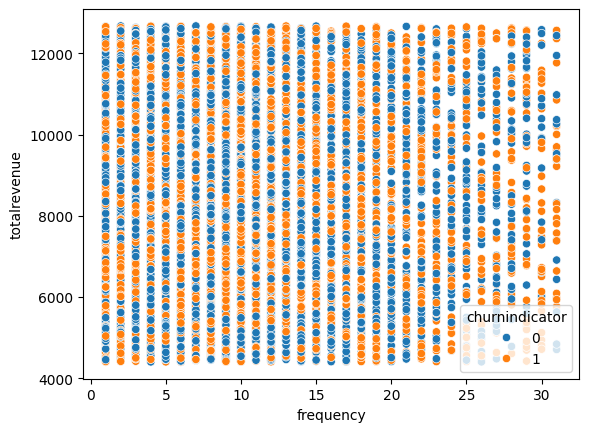

In [166]:
sns.scatterplot(data=df, y='totalrevenue', x='frequency', hue='churnindicator')
plt.show()

In [167]:
from pandas.plotting import parallel_coordinates
import plotly.express as px
x = df['hasloyaltycard'].replace({'no': 0, 'yes': 1})

fig = px.parallel_coordinates(
    df,
    dimensions=['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency', x],
    color=x,
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={
        'totalpurchases': 'Total Purchases',
        'totalrevenue': 'Total Revenue',
        'avgpurchasevalue': 'Avg Purchase Value',
        'frequency': 'Frequency',
        'dimensions_4': 'Loyalty Card Holder'
    },
    title='Parallel Coordinates Plot'
)

fig.show()


C:\Users\86153\AppData\Local\Temp\ipykernel_28472\4104830862.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



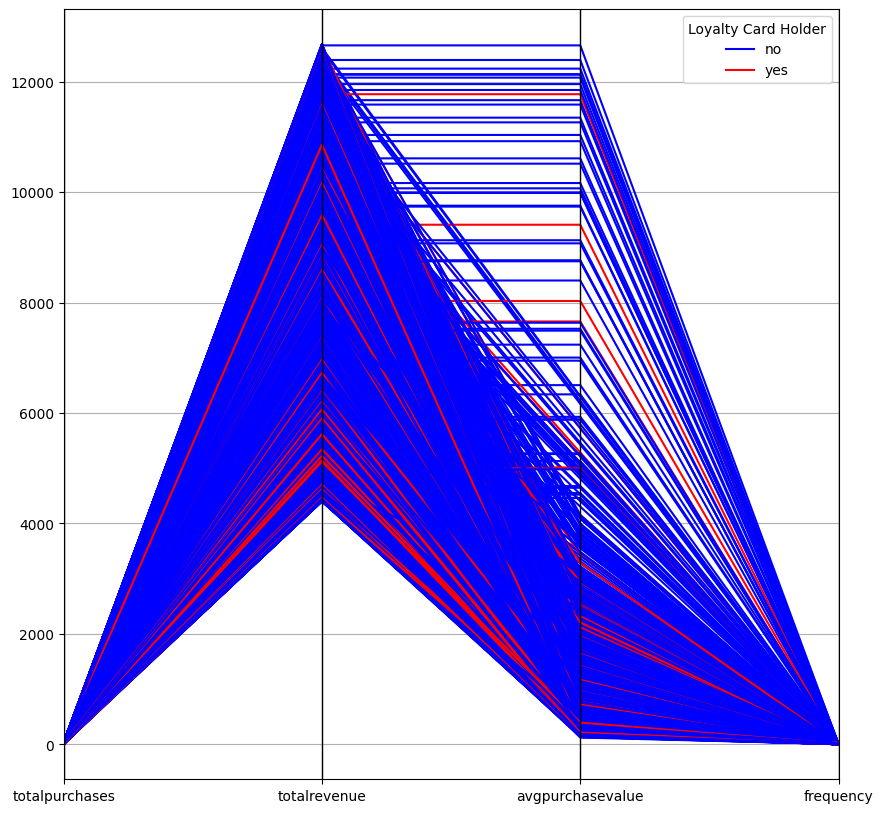

In [168]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.plotting.parallel_coordinates(
    df,
    cols=['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency'],
    class_column='hasloyaltycard',
    color=('#0000ff', '#ff0000'),
    ax=ax
)
plt.legend(title='Loyalty Card Holder')
plt.show()


# <center> CLV Modelling

### Ridge Regression:
1. Load the dataset and split it into training and testing sets, keeping 20% of the data for testing. 
2. Implement a Ridge Regression model using the provided features (`Recency`, `Frequency`, `AvgPurchaseValue`) to predict the `TotalRevenue`. 
3. Set the alpha parameter for Ridge Regression to 1.0. How does this value affect the coefficients of the model?
4. Evaluate the model using Mean Squared Error (MSE) on the test set. Report the obtained value.

In [169]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df[['recency', 'frequency', 'avgpurchasevalue']]
y = df['totalrevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Ridge MSE: {mse}")


Ridge MSE: 5519716.832207054


### Random Forest Regressor:
5. Implement a Random Forest Regressor with 100 trees to predict the CLV.
6. Using the feature importance attribute of the Random Forest model, list the features in order of their importance.
7. Evaluate the model's performance using the test set. How does it compare to the Ridge Regression model?

In [170]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse}")


Random Forest MSE: 3572881.24956035


### XGBoost:
11. Implement the XGBoost regressor to predict the CLV. Use 100 estimators for the model.
12. XGBoost offers various hyperparameters to tune. Alter the learning rate of the model. How does it impact the model's performance?
13. Evaluate the model using the test data and compare its MSE with previous models.

In [171]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse}")


XGBoost MSE: 3569061.0


### Advanced Regression Model

14. Train other regression models like Ridge, Lasso, Decision Trees, Random Forest, and Gradient Boosting to predict totalrevenue.
15. Use cross-validation for model selection and tuning.
16. Evaluate the models using the same metrics as before and compare their performances.

In [173]:
df.head()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544,609,9.285714
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211,1435,61.200000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574,810,8.137931
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376,765,25.933333
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540,955,31.923077


In [174]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Features and target
X = df[['totalpurchases','churnindicator','discountsused','feedbackscore','frequency',
        'avgpurchasevalue','recency','tenure','avgtimebetweenpurchases']]
y = df["totalrevenue"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
ridge = Ridge()
lasso = Lasso()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# List of models
models = [ridge, lasso, decision_tree, random_forest, gradient_boosting]
model_names = ["Ridge", "Lasso", "Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing metrics
    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")



Ridge:
Mean Absolute Error: 1983.8850790715026
Root Mean Squared Error: 2310.087703705686
R-squared: 0.08767188356153999

Lasso:
Mean Absolute Error: 1983.8389086269578
Root Mean Squared Error: 2310.043045638114
R-squared: 0.08770715704210208

Decision Tree:
Mean Absolute Error: 50.9305
Root Mean Squared Error: 99.92112139082508
R-squared: 0.9982930974735713

Random Forest:
Mean Absolute Error: 30.59153500000001
Root Mean Squared Error: 65.36760087573965
R-squared: 0.9992695016926095

Gradient Boosting:
Mean Absolute Error: 230.08715691237052
Root Mean Squared Error: 333.457838991845
R-squared: 0.9809902683959081



In [175]:
# Using cross validation for model selection and tuning
from sklearn.model_selection import cross_val_score

for model, name in zip(models, model_names):
    
    # Evaluating the list of MSE obtained by a 10-fold CV
    mse_cv = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
    
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    cv_mse = -mse_cv.mean()  # Convert from negative MSE to positive
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing metrics
    print(f"{name}:")
    print(f"Cross Validation Score MSE: {cv_mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")


Ridge:
Cross Validation Score MSE: 5199979.182668356
Mean Absolute Error: 1983.8850790715026
Root Mean Squared Error: 2310.087703705686
R-squared: 0.08767188356153999

Lasso:
Cross Validation Score MSE: 5199851.914999582
Mean Absolute Error: 1983.8389086269578
Root Mean Squared Error: 2310.043045638114
R-squared: 0.08770715704210208

Decision Tree:
Cross Validation Score MSE: 11047.860875
Mean Absolute Error: 50.9305
Root Mean Squared Error: 99.92112139082508
R-squared: 0.9982930974735713

Random Forest:
Cross Validation Score MSE: 6136.686626787499
Mean Absolute Error: 30.59153500000001
Root Mean Squared Error: 65.36760087573965
R-squared: 0.9992695016926095

Gradient Boosting:
Cross Validation Score MSE: 104609.79861707879
Mean Absolute Error: 230.08715691237052
Root Mean Squared Error: 333.457838991845
R-squared: 0.9809902683959081



### Hyperparameter Tuning:

17. For models that have hyperparameters, use techniques like GridSearchCV or RandomizedSearchCV to find optimal values.
18. Re-evaluate the models using the optimized hyperparameters.

In [176]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# # Assuming df is your DataFrame
# X = df[['totalpurchases','churnindicator','discountsused','feedbackscore','frequency',
#         'avgpurchasevalue','recency','tenure','avgtimebetweenpurchases','RFM_Score']]
# y = df["totalrevenue"]

# # Splitting the dataset (assuming you haven't already)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Setting hyperparameters grids for each model

# # 1. Ridge
# ridge_params = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
#     'normalize': [True, False],
#     'max_iter': [500, 1000, 1500]
# }

# # 2. Lasso
# lasso_params = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
#     'normalize': [True, False],
#     'max_iter': [500, 1000, 1500]
# }

# # 3. Decision Tree
# # decision_tree_params = {
# #     'criterion': ['mse', 'mae'],
# #     'splitter': ['best', 'random'],
# #     'max_depth': [None, 5, 10, 15],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4]
# # }

 # 4. Random Forest
random_forest_params = {
     'n_estimators': [50, 100, 150],
     'criterion': ['mse', 'mae'],
     'max_depth': [None, 5, 10, 15],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
 }

 # 5. Gradient Boosting
gradient_boosting_params = {
     'n_estimators': [50, 100, 150],
     'learning_rate': [0.001, 0.01, 0.1],
     'max_depth': [3, 5, 10, 15],
     'subsample': [0.5, 0.7, 0.9, 1],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
 }

# # Creating a list of models and their parameters
# models_params = [
#     (Ridge(), ridge_params),
#     (Lasso(), lasso_params),
# #     (DecisionTreeRegressor(random_state=42), decision_tree_params),
#     (RandomForestRegressor(random_state=42, verbose=2), random_forest_params),
#     (GradientBoostingRegressor(random_state=42, verbose=2), gradient_boosting_params)
# ]

# # Hyperparameter tuning using GridSearchCV
# for model, params in models_params:
#     grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
#     grid_result = grid.fit(X_train, y_train)
    
#     # Print the best parameters and scores
#     print(f"Best Parameters for {type(model).__name__}: {grid_result.best_params_}")
#     print(f"Best Cross-Validation Score for {type(model).__name__}: {-grid_result.best_score_}\n")



### Feature Importance:

19. For tree-based models like Random Forest and Gradient Boosting, extract feature importance scores.
20. Analyze and interpret the top features affecting totalrevenue.

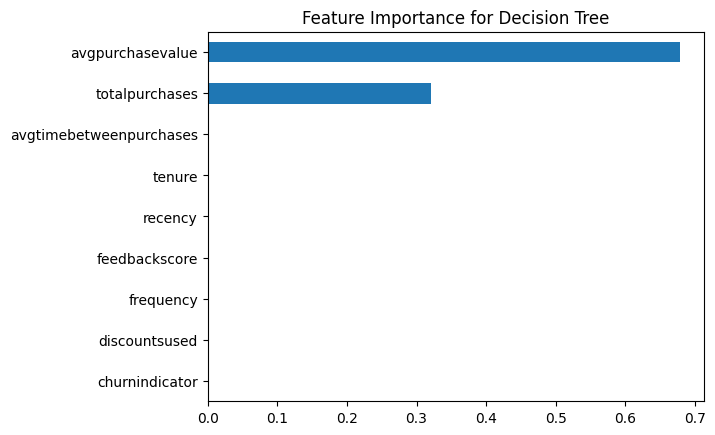

totalpurchases: 0.32063965778660564
churnindicator: 2.4700075186410894e-05
discountsused: 4.200212110313839e-05
feedbackscore: 5.107088046433318e-05
frequency: 4.641218496631404e-05
avgpurchasevalue: 0.6787083095114146
recency: 6.166644602348898e-05
tenure: 7.059747452790123e-05
avgtimebetweenpurchases: 0.00035558351970829016


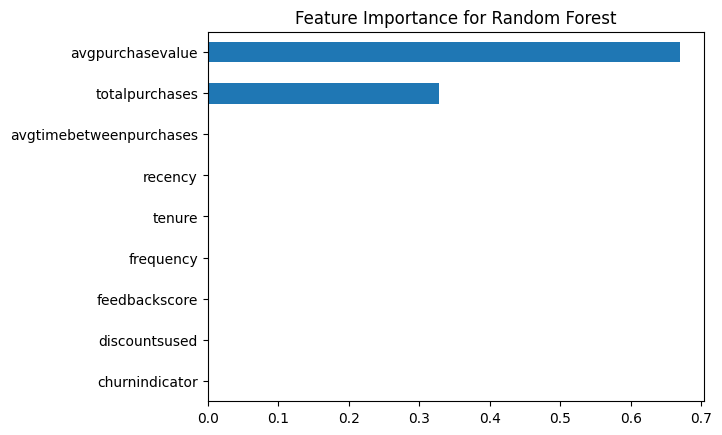

totalpurchases: 0.3280763991668242
churnindicator: 6.97386896563886e-05
discountsused: 0.00016922897122088431
feedbackscore: 0.00022197752900507073
frequency: 0.00029271150141229604
avgpurchasevalue: 0.6698407256799916
recency: 0.0003897361350512987
tenure: 0.00037849440340583846
avgtimebetweenpurchases: 0.0005609879234324947


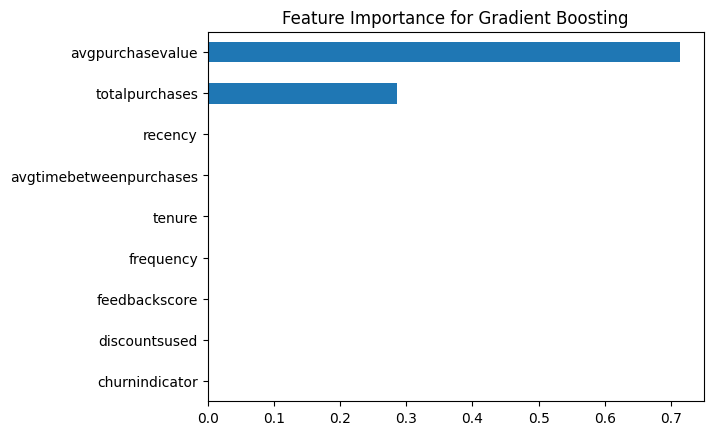

totalpurchases: 0.28615259748461785
churnindicator: 0.0
discountsused: 0.0
feedbackscore: 0.0
frequency: 0.0
avgpurchasevalue: 0.7138459828532144
recency: 1.4196621676895302e-06
tenure: 0.0
avgtimebetweenpurchases: 0.0


In [177]:
# Extracting feature importance

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Features and target
X = df[['totalpurchases','churnindicator','discountsused','feedbackscore','frequency',
        'avgpurchasevalue','recency','tenure','avgtimebetweenpurchases']]
y = df["totalrevenue"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# List of models
models = [decision_tree, random_forest, gradient_boosting]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    # Training the model
    model.fit(X_train, y_train)
    
    # Feature importance
    importances = pd.Series(model.feature_importances_, index=X.columns)
    sorted_importances = importances.sort_values()
    
    # Plotting
    sorted_importances.plot(kind='barh')
    plt.title(f'Feature Importance for {name}')
    plt.show()
    
    # Printing values
    for feature, importance in zip(X.columns, model.feature_importances_):
        print(f"{feature}: {importance}")
